In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Librerías de ejemplo de NN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


In [4]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


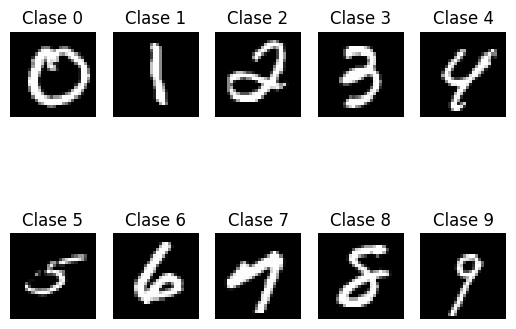

In [5]:
#muestra una imagen de cada categoria
import random
for i in range(10):
    idx = random.choice(np.where(y[:, i] == 1)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Clase {i}')
plt.show()

In [6]:
# define la funcion que crea el modelo MLP con keras
def crear_modelo(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# Entrena un modelo con los datos de entrenamiento
create_mlp = crear_modelo
model = create_mlp(input_dim=28*28, num_classes=10)       
model.summary()
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\josep\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9230 - loss: 0.2642 - val_accuracy: 0.9549 - val_loss: 0.1490
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1109 - val_accuracy: 0.9700 - val_loss: 0.1027
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0770 - val_accuracy: 0.9694 - val_loss: 0.1043
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0568 - val_accuracy: 0.9687 - val_loss: 0.1072
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9722 - val_loss: 0.0944
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0349 - val_accuracy: 0.9729 - val_loss: 0.0986
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0308 - val_accuracy: 0.9748 - val_loss: 0.0976
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0241 - 

In [8]:
# Evalua el modelo con los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

